**Import the relevant libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

warnings.filterwarnings('ignore')

**Load the data**

In [5]:
customer_features1 = pd.read_csv('customer_features1.csv')

In [6]:
customer_features1

,CustomerID,CustGender,CustLocation,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,C1010011,F,NEW DELHI,24,74,2,7.171923,14.343846
1,C1010012,M,MUMBAI,22,117,1,7.313220,7.313220
2,C1010014,F,MUMBAI,32,154,2,6.310259,12.620517
3,C1010018,F,CHAMPARAN,26,85,1,3.433987,3.433987
4,C1010024,M,KOLKATA,28,113,1,8.517393,8.517393
...,...,...,...,...,...,...,...,...
814186,C9099836,M,BHIWANDI,26,154,1,6.539586,6.539586
814187,C9099877,M,BANGALORE,20,85,1,5.407172,5.407172
814188,C9099919,M,GUNTUR,23,113,1,4.844187,4.844187
814189,C9099941,M,CHENNAI,21,103,1,3.931826,3.931826


**Select the features**

In [8]:
x = customer_features1.iloc[:, 3:8]

In [9]:
x

,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,24,74,2,7.171923,14.343846
1,22,117,1,7.313220,7.313220
2,32,154,2,6.310259,12.620517
3,26,85,1,3.433987,3.433987
4,28,113,1,8.517393,8.517393
...,...,...,...,...,...
814186,26,154,1,6.539586,6.539586
814187,20,85,1,5.407172,5.407172
814188,23,113,1,4.844187,4.844187
814189,21,103,1,3.931826,3.931826


**Standardize the features before clustering**

In [11]:
columns_to_scale = ['Age', 'Recency', 'Frequency', 'AvgMonetary', 'TotalMonetary']

In [12]:
#declare a scaler object
scaler = StandardScaler()

In [13]:
scaler.fit(x)

StandardScaler()

In [14]:
x_scaled = scaler.fit_transform(x[columns_to_scale])

In [15]:
x_scaled

array([[-0.94284168, -0.69043833,  1.92403464,  0.82806146,  2.41461942],
       [-1.35228425, -0.15527677, -0.39694904,  0.92430932,  0.11098863],
       [ 0.69492856,  0.30521108,  1.92403464,  0.24111923,  1.84995938],
       ...,
       [-1.14756296, -0.20505924, -0.39694904, -0.75752861, -0.69800638],
       [-1.55700553, -0.32951542, -0.39694904, -1.37900426, -0.99694761],
       [ 1.10437112, -0.67799271, -0.39694904,  0.54220552, -0.07281033]])

**New dataframe for the scaled features**

In [17]:
# Convert the scaled array back into a DataFrame
scaled_df = pd.DataFrame(x_scaled, columns=columns_to_scale, index=x.index)

In [18]:
scaled_df

,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,-0.942842,-0.690438,1.924035,0.828061,2.414619
1,-1.352284,-0.155277,-0.396949,0.924309,0.110989
2,0.694929,0.305211,1.924035,0.241119,1.849959
3,-0.533399,-0.553537,-0.396949,-1.718118,-1.160068
4,-0.123957,-0.205059,-0.396949,1.744559,0.505544
...,...,...,...,...,...
814186,-0.533399,0.305211,-0.396949,0.397331,-0.142498
814187,-1.761727,-0.553537,-0.396949,-0.374039,-0.513541
814188,-1.147563,-0.205059,-0.396949,-0.757529,-0.698006
814189,-1.557006,-0.329515,-0.396949,-1.379004,-0.996948


**Make a copy of the scaled features**

In [20]:
scaled_num_features = scaled_df.copy()

In [21]:
scaled_num_features

,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,-0.942842,-0.690438,1.924035,0.828061,2.414619
1,-1.352284,-0.155277,-0.396949,0.924309,0.110989
2,0.694929,0.305211,1.924035,0.241119,1.849959
3,-0.533399,-0.553537,-0.396949,-1.718118,-1.160068
4,-0.123957,-0.205059,-0.396949,1.744559,0.505544
...,...,...,...,...,...
814186,-0.533399,0.305211,-0.396949,0.397331,-0.142498
814187,-1.761727,-0.553537,-0.396949,-0.374039,-0.513541
814188,-1.147563,-0.205059,-0.396949,-0.757529,-0.698006
814189,-1.557006,-0.329515,-0.396949,-1.379004,-0.996948


**Clustering**

In [23]:
kmeans = KMeans(4)

In [24]:
kmeans.fit(x_scaled)

KMeans(n_clusters=4)

In [25]:
identified_clusters = kmeans.fit_predict(scaled_num_features)
identified_clusters

array([2, 3, 2, ..., 0, 0, 3])

In [26]:
#create a dataframe to see things more clearly
data_with_clusters = scaled_num_features
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Age,Recency,Frequency,AvgMonetary,TotalMonetary,Cluster
0,-0.942842,-0.690438,1.924035,0.828061,2.414619,2
1,-1.352284,-0.155277,-0.396949,0.924309,0.110989,3
2,0.694929,0.305211,1.924035,0.241119,1.849959,2
3,-0.533399,-0.553537,-0.396949,-1.718118,-1.160068,0
4,-0.123957,-0.205059,-0.396949,1.744559,0.505544,3
...,...,...,...,...,...,...
814186,-0.533399,0.305211,-0.396949,0.397331,-0.142498,3
814187,-1.761727,-0.553537,-0.396949,-0.374039,-0.513541,0
814188,-1.147563,-0.205059,-0.396949,-0.757529,-0.698006,0
814189,-1.557006,-0.329515,-0.396949,-1.379004,-0.996948,0


In [86]:
customer_features1['Cluster'] = data_with_clusters['Cluster']

In [88]:
customer_features1

,CustomerID,CustGender,CustLocation,Age,Recency,Frequency,AvgMonetary,TotalMonetary,Cluster
0,C1010011,F,NEW DELHI,24,74,2,7.171923,14.343846,2
1,C1010012,M,MUMBAI,22,117,1,7.313220,7.313220,3
2,C1010014,F,MUMBAI,32,154,2,6.310259,12.620517,2
3,C1010018,F,CHAMPARAN,26,85,1,3.433987,3.433987,0
4,C1010024,M,KOLKATA,28,113,1,8.517393,8.517393,3
...,...,...,...,...,...,...,...,...,...
814186,C9099836,M,BHIWANDI,26,154,1,6.539586,6.539586,3
814187,C9099877,M,BANGALORE,20,85,1,5.407172,5.407172,0
814188,C9099919,M,GUNTUR,23,113,1,4.844187,4.844187,0
814189,C9099941,M,CHENNAI,21,103,1,3.931826,3.931826,0


In [90]:
customer_features1.to_csv('customer_features.csv', index=False)

**Principal Component Analysis (PCA)**

In [28]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_scaled)

In [29]:
#create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = identified_clusters

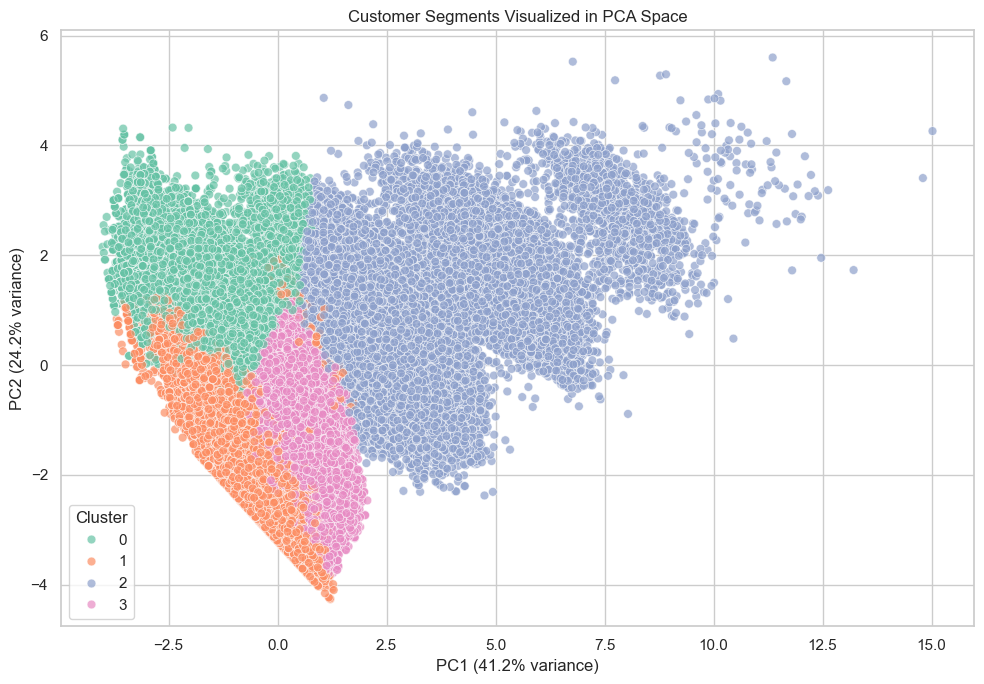

In [30]:
#visualize PCA with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=40, alpha=0.7)
plt.title('Customer Segments Visualized in PCA Space')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.savefig('pca_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

**Explained Variance**

In [32]:
# View how much variance is explained by each component
explained_var = pca.explained_variance_ratio_
print(f"Explained variance by PC1 and PC2: {explained_var[0]:.2%}, {explained_var[1]:.2%}")
print(f"Total explained variance: {explained_var.sum():.2%}")

Explained variance by PC1 and PC2: 41.23%, 24.25%
Total explained variance: 65.47%


**Component Loadings Plot**

In [34]:
# Get loadings for each original feature
feature_names = ['Age', 'Recency', 'Frequency', 'AvgMonetary', 'TotalMonetary']
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)

In [35]:
# Round the component loadings for cleaner display
loadings_rounded = loadings.copy()
loadings_rounded['PC1'] = loadings_rounded['PC1'].round(3)
loadings_rounded['PC2'] = loadings_rounded['PC2'].round(3)

# Reset index so 'Feature' becomes a column
loadings_rounded = loadings_rounded.reset_index().rename(columns={'index': 'Feature'})

# Display formatted table
display(loadings_rounded)

,Feature,PC1,PC2
0,Age,0.143,-0.584
1,Recency,-0.209,-0.402
2,Frequency,0.581,0.372
3,AvgMonetary,0.361,-0.599
4,TotalMonetary,0.684,-0.000


**Selecting the number of clusters using the elbow method**

In [37]:
kmeans.inertia_

1716579.7944733968

In [38]:
#to plot the elbow, we need to calculate the WCSS for each cluster
#we do this with a loop
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [39]:
wcss

[4070954.999999975,
 2806446.4531021407,
 2154005.838417329,
 1716583.164655342,
 1464614.2292813945,
 1321724.5824491298,
 1196816.036508717,
 1095702.6179686657,
 1015775.3181097055,
 944116.2430661025]

**The elbow method**

Text(0, 0.5, 'Within-Cluster Sum of Squares')

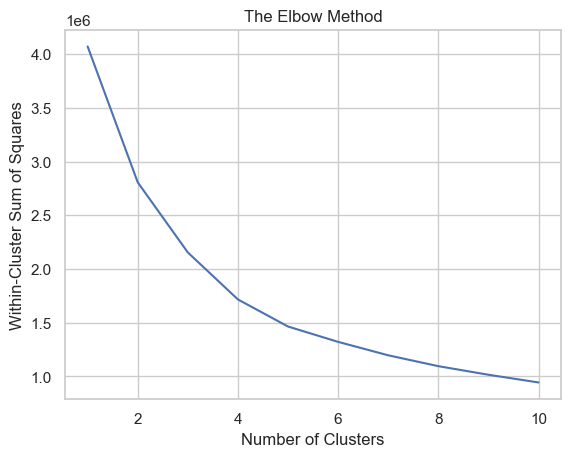

In [41]:
number_clusters = range(1,11)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

**Analysis of Variance**

In [43]:
# List of numeric features to test
features_to_test = ['Age', 'Recency', 'Frequency', 'AvgMonetary', 'TotalMonetary']

In [44]:
#group the data by clusters
clustered_data = customer_features1.copy()
clustered_data['Cluster'] = identified_clusters

In [45]:
#list to store ANOVA results
anova_results = []

#ANOVA for each feature
for feature in features_to_test:
    groups = [clustered_data[clustered_data['Cluster'] == i][feature] for i in clustered_data['Cluster'].unique()]
    f_stat, p_val = f_oneway(*groups)
    anova_results.append({'Feature': feature, 'F-statistic': f_stat, 'P-value': p_val})

In [46]:
# Convert to DataFrame
anova_df = pd.DataFrame(anova_results)

In [47]:
# Format for readability
anova_df['F-statistic'] = anova_df['F-statistic'].round(2)
anova_df['P-value'] = anova_df['P-value'].apply(lambda x: f"{x:.4f}")

# Display the table
display(anova_df)

,Feature,F-statistic,P-value
0,Age,54280.13,0.0000
1,Recency,608546.27,0.0000
2,Frequency,1811956.12,0.0000
3,AvgMonetary,204286.78,0.0000
4,TotalMonetary,749814.95,0.0000


**BoxPlots**

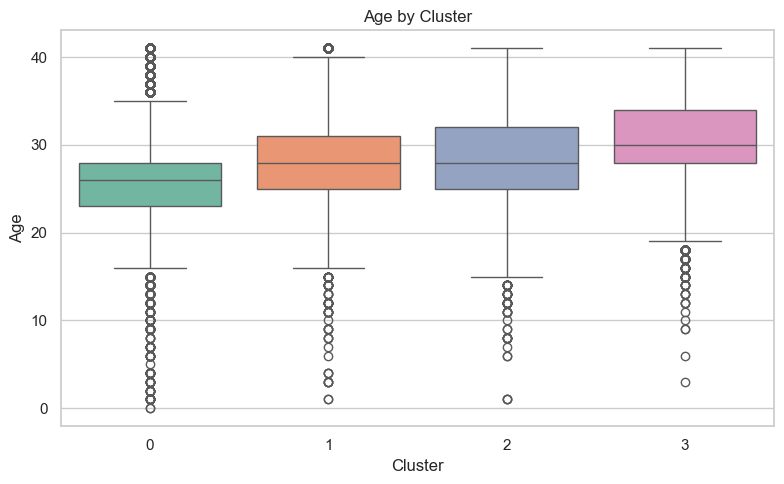

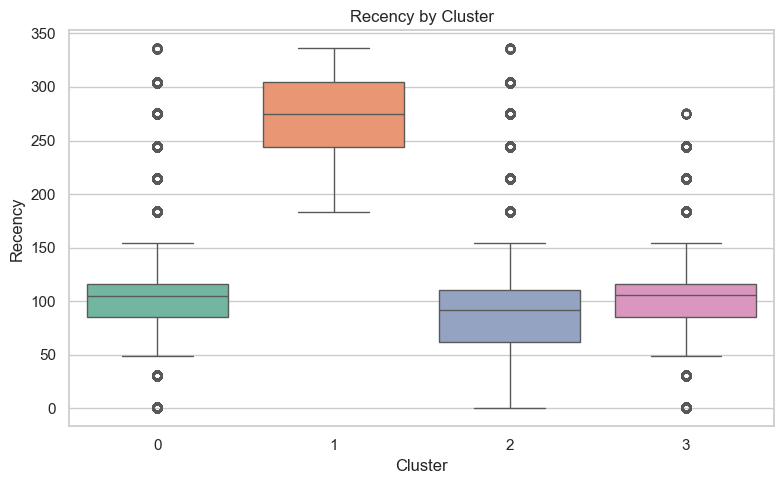

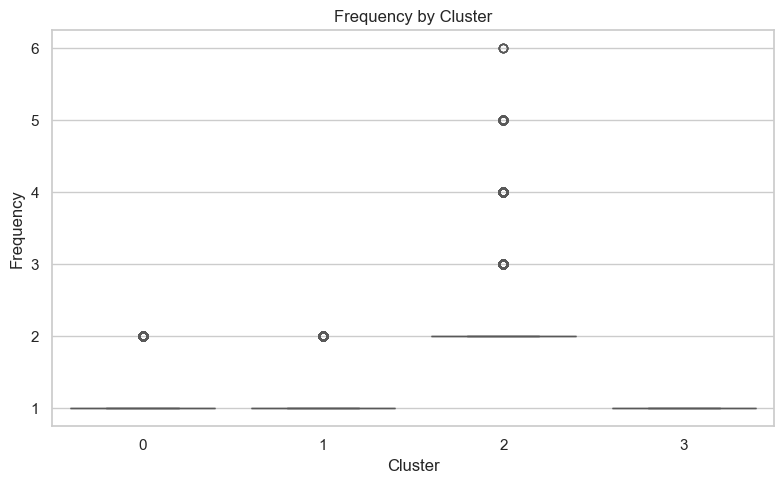

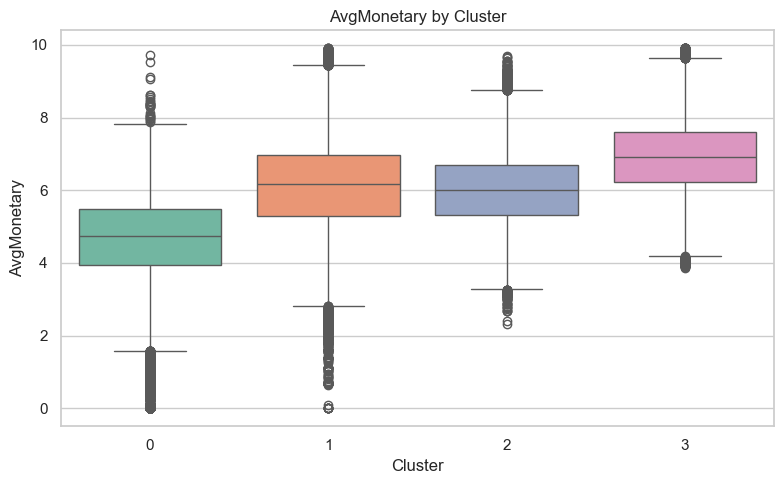

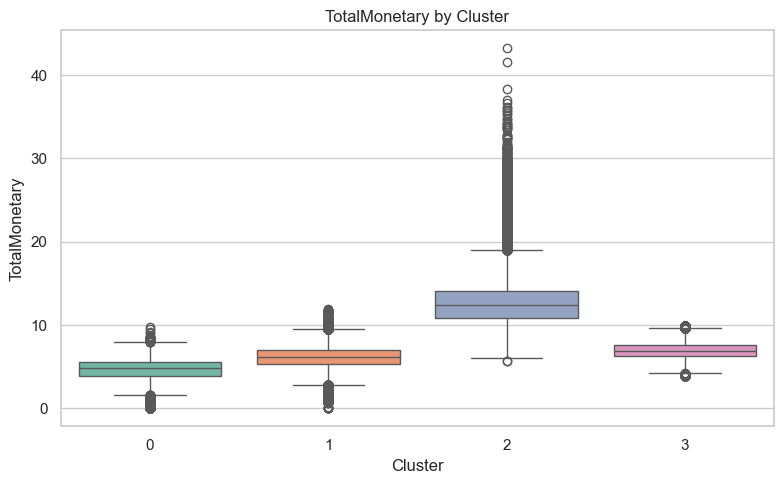

In [49]:
# Create a boxplot for each feature
for feature in feature_names:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=clustered_data, palette='Set2')
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.tight_layout()

    # Save plot as PNG file
    filename = f'{feature}_by_cluster.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()